In [51]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [3]:
# a better way of reading the csv file should be used, this is inefficient as it considers
# the entire file (low_memory=False) instead of reading it line by line. This is because, for some reason,
# pandas does not know how to parse the dates.
papers = pd.read_csv('papers.csv', parse_dates = ["date"], low_memory=False)

In [4]:
papers.head()

,title,id,categories,version,total_versions,date
0,Calculation of prompt diphoton production cros...,0704.0001,hep-ph,1,2,2007-04-02 19:18:42+00:00
1,Calculation of prompt diphoton production cros...,0704.0001,hep-ph,2,2,2007-07-24 20:10:27+00:00
2,Sparsity-certifying Graph Decompositions,0704.0002,math.CO cs.CG,1,2,2007-03-31 02:26:18+00:00
3,Sparsity-certifying Graph Decompositions,0704.0002,math.CO cs.CG,2,2,2008-12-13 17:26:00+00:00
4,The evolution of the Earth-Moon system based o...,0704.0003,physics.gen-ph,1,3,2007-04-01 20:46:54+00:00


In [10]:
papers.date.describe(datetime_is_numeric=True)

count                                1842324
mean        2014-06-23 17:57:57.227680+00:00
min                1989-11-17 15:28:00+00:00
25%      2010-08-02 14:50:54.750000128+00:00
50%                2016-02-28 07:32:45+00:00
75%                2019-10-12 19:17:07+00:00
max                2022-07-07 17:57:21+00:00
Name: date, dtype: object

In [12]:
papers.drop_duplicates('id').total_versions.describe()

count    780771.000000
mean          2.359619
std           0.603273
min           2.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: total_versions, dtype: float64

In [17]:
# Open JSON file with categories
categories_path = 'categories.json'
f = open(categories_path)
categories = json.load(f)

In [35]:
# create dict with number of papers in each subcategory (astro-ph.GA, hep-th etc.)
sub_counts = {}
for category in categories:
    sub_counts[category] = {}
    for subcategory in categories[category]:
        sub_counts[category][subcategory] = 0

for index, row in papers.drop_duplicates('id').iterrows():
    # a paper may have more than one category, so the string must be split
    for self_category in row['categories'].split():
        for category in categories:
            if self_category in categories[category]:
                sub_counts[category][self_category] += 1

In [36]:
# get counts for each category (physics, com sci etc.) by adding up the values for each subcategory 
cat_counts = {}
for category in categories:
    cat_counts[category] = 0
    for subcategory in categories[category]:
        cat_counts[category] += sub_counts[category][subcategory]

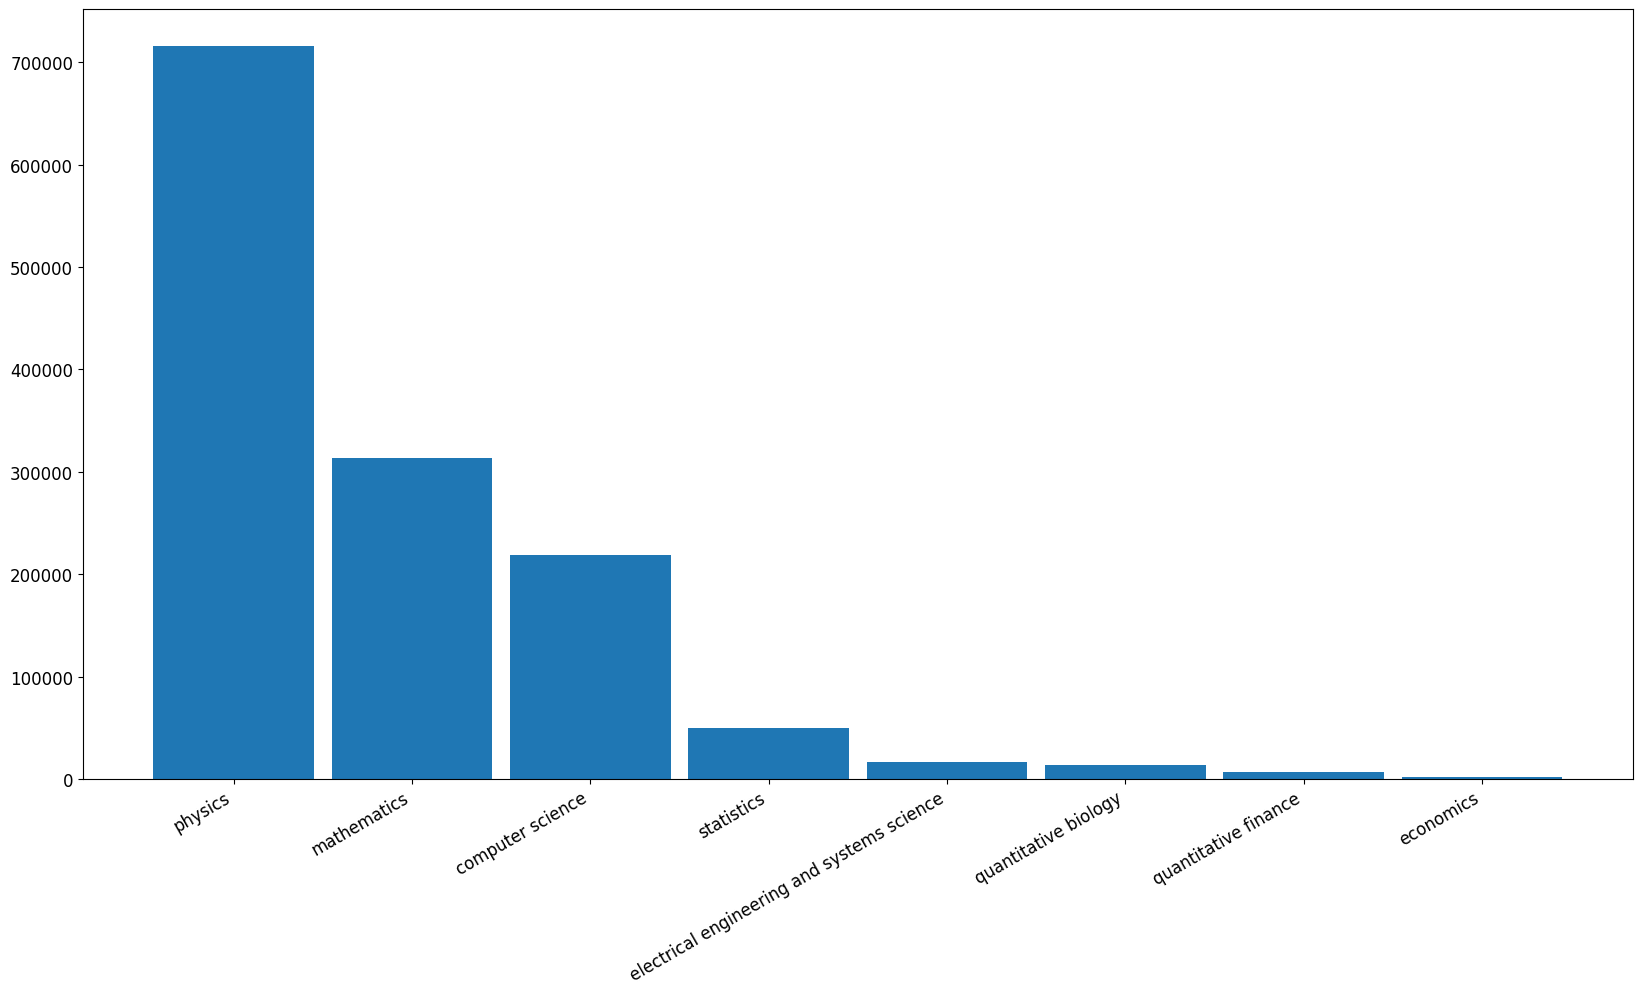

In [48]:
# Create bar plot with major categories

# turn dict of category counts into list of tuples and sort it by the second element
cat_counts_sorted = sorted(list(cat_counts.items()), key = lambda x: x[1], reverse=True)

cat_labels = [tpl[0] for tpl in cat_counts_sorted]
cat_values = [tpl[1] for tpl in cat_counts_sorted]
  
fig = plt.figure(figsize = (20, 10))
ax = plt.gca()

plt.bar(cat_labels, cat_values, width = 0.9)

plt.xticks(rotation=30, ha='right')
ax.tick_params(axis='both', labelsize=12)

plt.show()

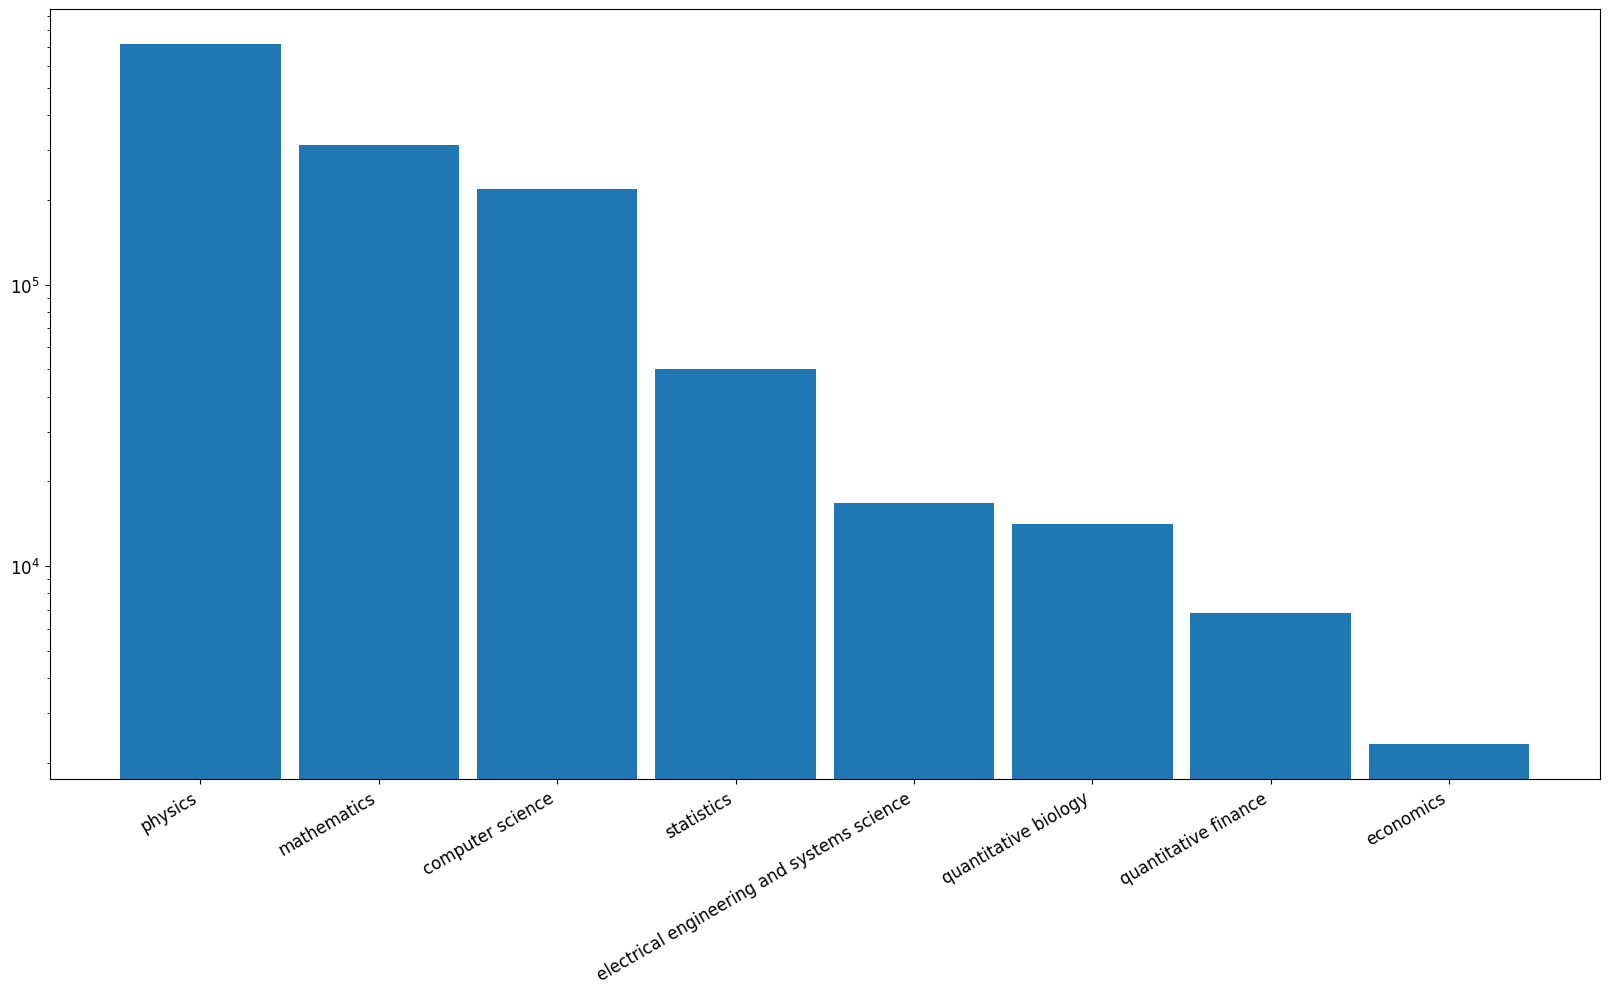

In [49]:
fig = plt.figure(figsize = (20, 10))
ax = plt.gca()

plt.bar(cat_labels, cat_values, width = 0.9)

plt.xticks(rotation=30, ha='right')
ax.tick_params(axis='both', labelsize=12)

ax.set_yscale('log')

plt.show()

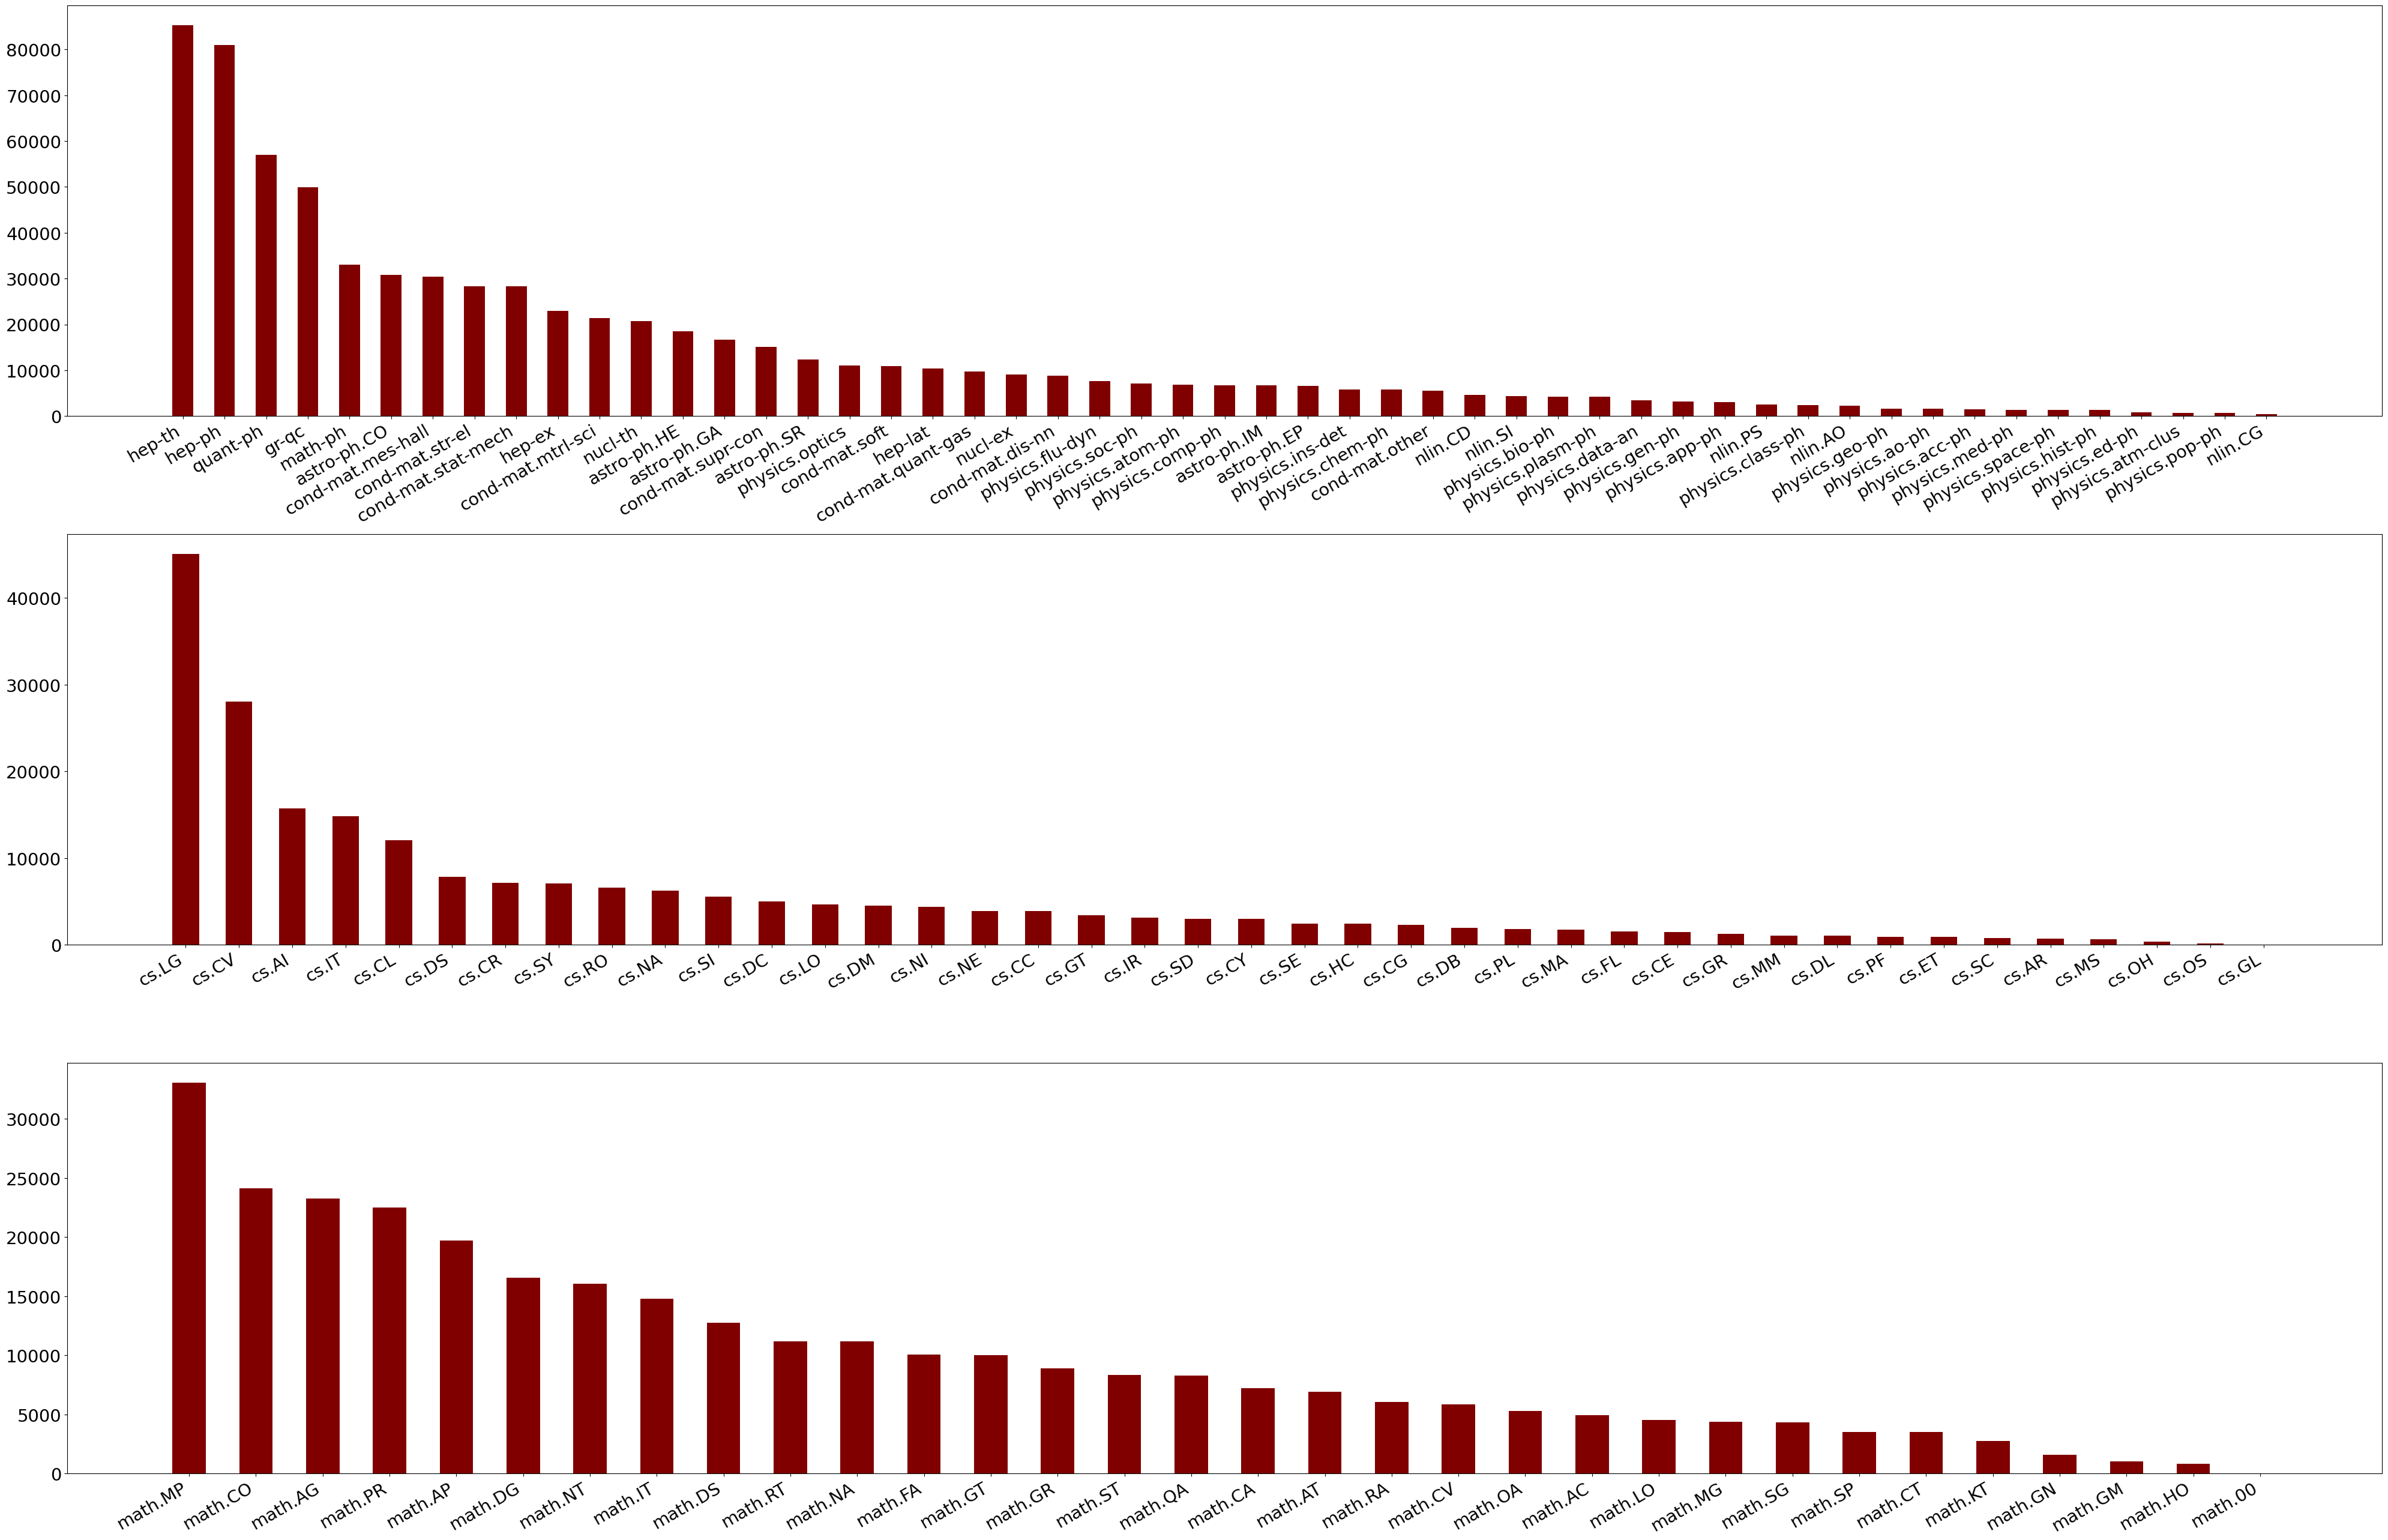

In [50]:
# Create bar plot with physics subcategories
plt.figure(figsize=(40, 25))

for i, subcat in enumerate(['physics', 'computer science', 'mathematics']):
    # turn dict of subcategory counts into list of tuples and sort it by the second element
    subcat_counts_sorted = sorted(list(sub_counts[subcat].items()), key = lambda x: x[1], reverse=True)
    subcat_labels = [tpl[0] for tpl in subcat_counts_sorted]
    subcat_values = [tpl[1] for tpl in subcat_counts_sorted]

    plt.subplot(3, 1, i + 1)
    plt.tight_layout()
    
    plt.bar(subcat_labels, subcat_values, color ='maroon', width = 0.5)

    plt.xticks(rotation=30, ha='right')
    plt.gca().tick_params(axis='both', labelsize=21)

plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(papers.total_versions)

plt.show()

,title,id,categories,version,total_versions,date
0,Calculation of prompt diphoton production cros...,0704.0001,hep-ph,1,2,2007-04-02 19:18:42+00:00
1,Calculation of prompt diphoton production cros...,0704.0001,hep-ph,2,2,2007-07-24 20:10:27+00:00
2,Sparsity-certifying Graph Decompositions,0704.0002,math.CO cs.CG,1,2,2007-03-31 02:26:18+00:00
3,Sparsity-certifying Graph Decompositions,0704.0002,math.CO cs.CG,2,2,2008-12-13 17:26:00+00:00
4,The evolution of the Earth-Moon system based o...,0704.0003,physics.gen-ph,1,3,2007-04-01 20:46:54+00:00


In [14]:
def is_math(x):
    for self_cat in x.split():
        for subcat in categories["mathematics"]:
            if subcat == self_cat:
                return True
    return False

In [15]:
def is_cs(x):
    for self_cat in x.split():
        for subcat in categories["computer science"]:
            if subcat == self_cat:
                return True
    return False

In [43]:
def is_phys(x):
    for self_cat in x.split():
        for subcat in categories["physics"]:
            if subcat == self_cat:
                return True
    return False

In [22]:
cs_papers = papers.loc[papers["categories"].apply(is_cs)].reset_index(drop = True)

In [23]:
math_papers = papers.loc[papers["categories"].apply(is_math)].reset_index(drop = True)

In [44]:
phys_papers = papers.loc[papers["categories"].apply(is_phys)].reset_index(drop = True)

In [46]:
cs_cnt = cs_papers.drop_duplicates("id").id.count()
math_cnt = math_papers.drop_duplicates("id").id.count()
phys_cnt = phys_papers.drop_duplicates("id").id.count()

In [47]:
cs_math_cnt = cs_papers.drop_duplicates("id").merge(math_papers.drop_duplicates("id")).id.count()
phys_cs_cnt = phys_papers.drop_duplicates("id").merge(cs_papers.drop_duplicates("id")).id.count()
math_phys_cnt = math_papers.drop_duplicates("id").merge(phys_papers.drop_duplicates("id")).id.count()

In [48]:
phys_cs_math_cnt = phys_papers.drop_duplicates("id").merge(cs_papers.drop_duplicates("id").merge(math_papers.drop_duplicates("id"))).id.count()

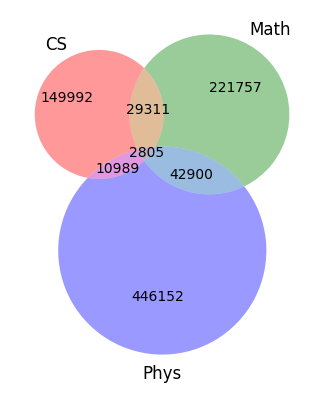

In [53]:
# (Cmp, cMp, CMp, cmP, CmP, cMP, CMP)
venn3(subsets = (cs_cnt, math_cnt, cs_math_cnt, phys_cnt, phys_cs_cnt, math_phys_cnt, phys_cs_math_cnt), set_labels = ('CS', 'Math', 'Phys'))